# Gianluca BAGHINO GÓMEZ

## Installing Libraries and Loading Example Image

In [2]:
import os  # For navigating the file system
import cv2  # For image processing
import numpy as np  # For numerical operations and handling arrays
import matplotlib.pyplot as plt  # For data visualization
from sklearn.model_selection import train_test_split  # For splitting datasets
from sklearn.neighbors import KNeighborsClassifier  # For the KNN algorithm
from sklearn.metrics import accuracy_score, confusion_matrix  # For evaluating the model

# Define the base path to the dataset
base_path = r'C:\Users\gianl\Documents\S1_3A_2024\CSC_5RO11_TA\Facial_Expression_Recognition_KNN_Gianluca_Baghino_Gómez\archive(1)'

# Define the paths for training and testing datasets
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')

# List all emotion categories in the training directory
emotion_list = os.listdir(train_path)
print("There are {} different emotions:".format(len(emotion_list)))
print(emotion_list)

print("Training Directory Contents:", os.listdir(train_path))
print("Testing Directory Contents:", os.listdir(test_path))

There are 7 different emotions:
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Training Directory Contents: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Testing Directory Contents: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


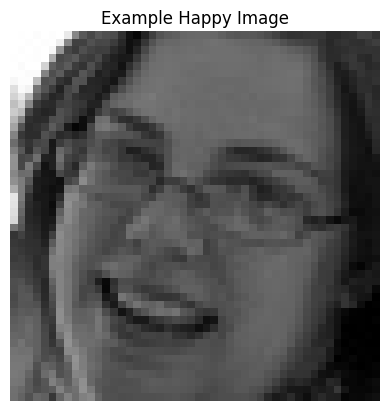

In [3]:
# Define the path to the 'happy' emotion images in the training dataset
train_happy_path = os.path.join(train_path, "happy")

# Get the name of the first image in the 'happy' folder
img_example_name = os.listdir(train_happy_path)[0]

# Read the image file using matplotlib
img_example = plt.imread(os.path.join(train_happy_path, img_example_name))

# Display the example image in grayscale
plt.imshow(img_example, cmap='gray')  
plt.axis('off')  
plt.title("Example Happy Image") 
plt.show() 

## Check the First Image in Each Emotion Folder

In [4]:
# Function to check the first image in each emotion directory and count the images
def check_first_image(folder):
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    
    for emotion in emotions:
        emotion_folder = os.path.join(folder, emotion)
        if os.path.exists(emotion_folder):
            print(f"Checking the first image in: {emotion_folder}")
            image_files = os.listdir(emotion_folder)
            num_images = len(image_files)  # Count the number of images
            if image_files:  # Check if there are any images
                first_image = image_files[0]  # Get the first image file
                file_path = os.path.join(emotion_folder, first_image)
                file_name, file_extension = os.path.splitext(first_image)
                print(f"First File Name: {file_name}, File Type: {file_extension}, Full Path: {file_path}, Total Images: {num_images}")
            else:
                print(f"Warning: No images found in {emotion_folder}.")
        else:
            print(f"Warning: Emotion directory {emotion_folder} does not exist.")

# Check the first image in the training and testing datasets
print("Training Dataset:")
check_first_image(train_path)
print("\nTesting Dataset:")
check_first_image(test_path)

Training Dataset:
Checking the first image in: C:\Users\gianl\Documents\S1_3A_2024\CSC_5RO11_TA\Facial_Expression_Recognition_KNN_Gianluca_Baghino_Gómez\archive(1)\train\angry
First File Name: Training_10118481, File Type: .jpg, Full Path: C:\Users\gianl\Documents\S1_3A_2024\CSC_5RO11_TA\Facial_Expression_Recognition_KNN_Gianluca_Baghino_Gómez\archive(1)\train\angry\Training_10118481.jpg, Total Images: 3995
Checking the first image in: C:\Users\gianl\Documents\S1_3A_2024\CSC_5RO11_TA\Facial_Expression_Recognition_KNN_Gianluca_Baghino_Gómez\archive(1)\train\disgust
First File Name: Training_10371709, File Type: .jpg, Full Path: C:\Users\gianl\Documents\S1_3A_2024\CSC_5RO11_TA\Facial_Expression_Recognition_KNN_Gianluca_Baghino_Gómez\archive(1)\train\disgust\Training_10371709.jpg, Total Images: 436
Checking the first image in: C:\Users\gianl\Documents\S1_3A_2024\CSC_5RO11_TA\Facial_Expression_Recognition_KNN_Gianluca_Baghino_Gómez\archive(1)\train\fear
First File Name: Training_10018621, 

## Loading Images from the Train and Test Datasets

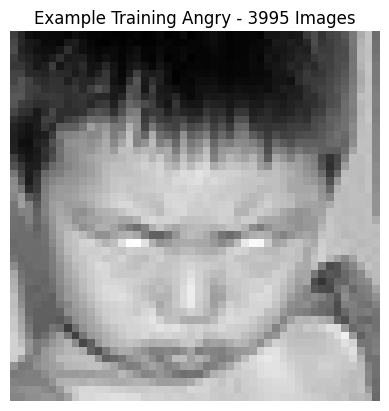

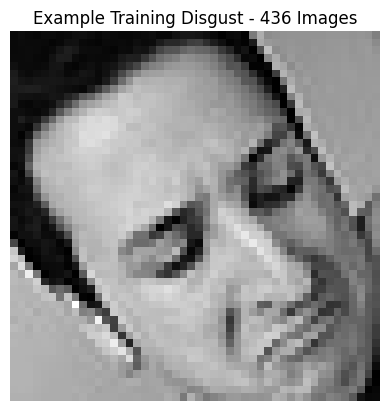

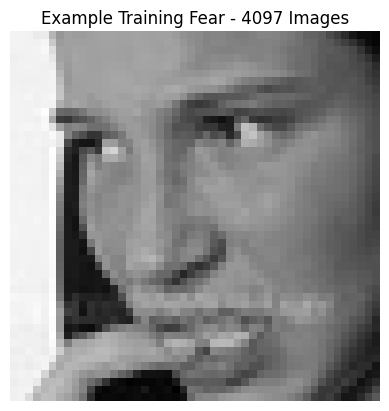

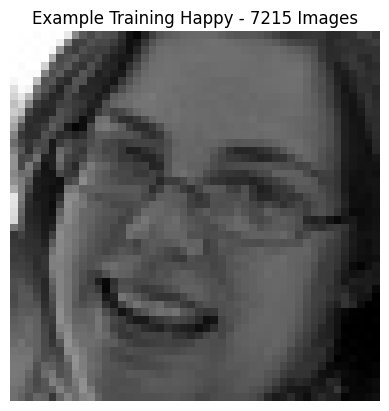

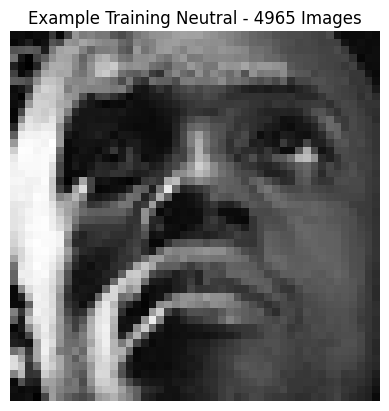

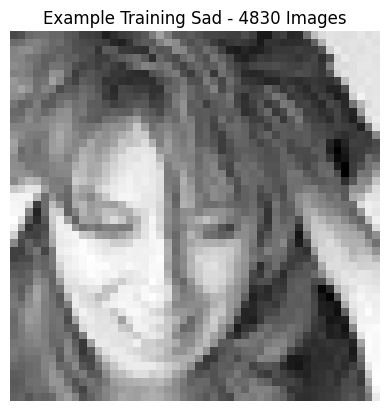

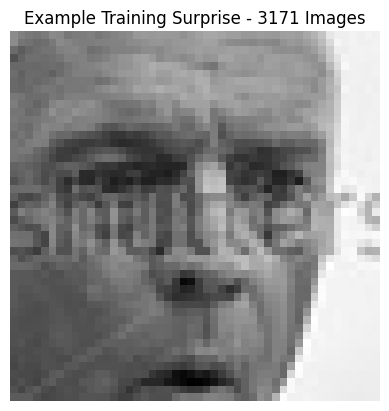

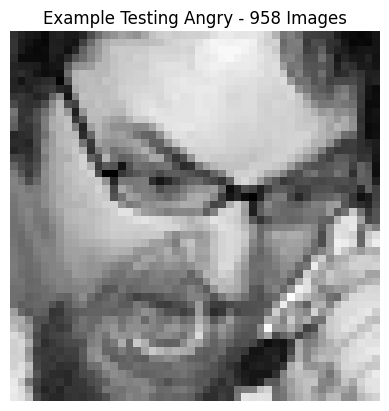

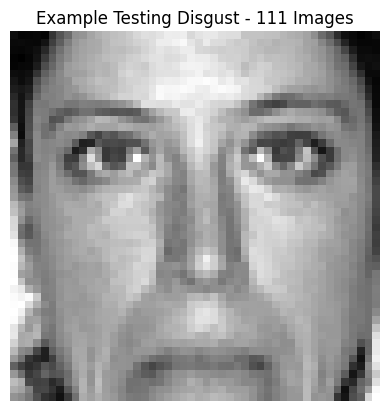

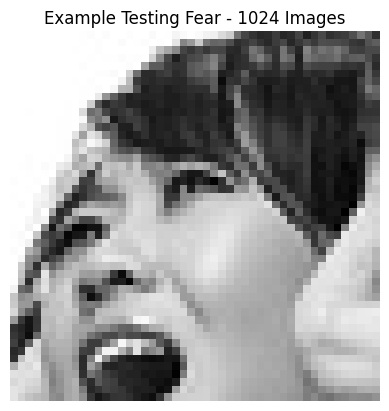

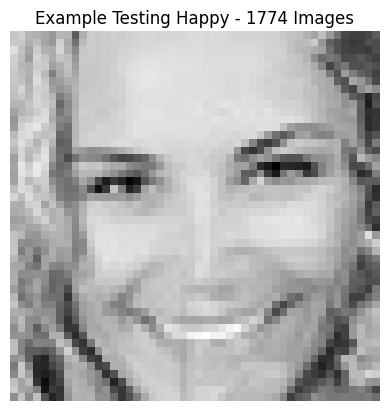

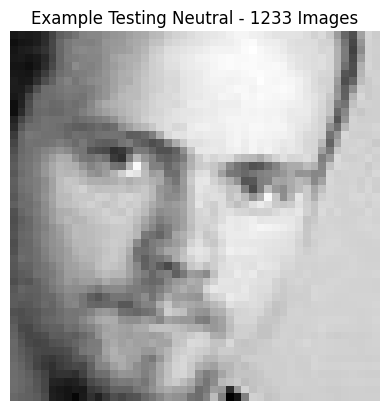

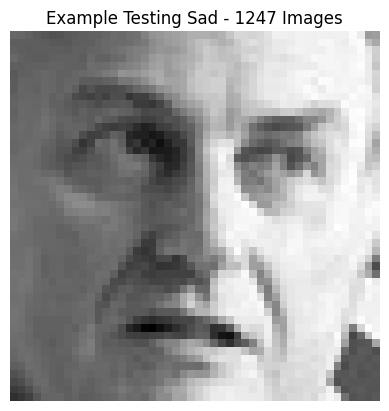

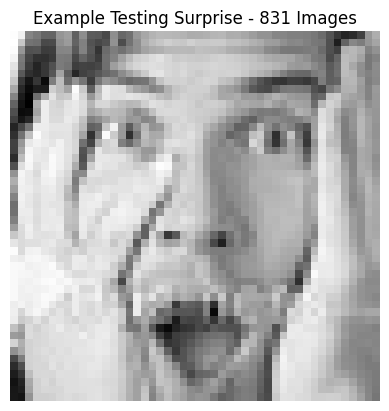

In [5]:
# Define paths for training and testing datasets
train_path = r"C:\Users\gianl\Documents\S1_3A_2024\CSC_5RO11_TA\Facial_Expression_Recognition_KNN_Gianluca_Baghino_Gómez\archive(1)\train"
test_path = r"C:\Users\gianl\Documents\S1_3A_2024\CSC_5RO11_TA\Facial_Expression_Recognition_KNN_Gianluca_Baghino_Gómez\archive(1)\test"

# Function to display the first image and count the images in each emotion folder
def display_first_images_and_count(folder, title_prefix):
    emotions = os.listdir(folder)  # List of emotion folders
    for emotion in emotions:
        emotion_path = os.path.join(folder, emotion)  # Full path to the emotion folder
        if os.path.isdir(emotion_path):  # Check if it's a directory
            # Count the number of images in the folder
            num_images = len(os.listdir(emotion_path))
            # Get the name of the first image in the emotion folder
            img_example_name = os.listdir(emotion_path)[0]  # Get the first image
            # Read the image file
            img_example = plt.imread(os.path.join(emotion_path, img_example_name))
            # Display the image
            plt.imshow(img_example, cmap='gray')
            plt.axis('off')
            plt.title(f"{title_prefix} {emotion.capitalize()} - {num_images} Images")  # Title with prefix, emotion name, and count
            plt.show()

# Display first images and counts from the training dataset
display_first_images_and_count(train_path, "Example Training")

# Display first images and counts from the testing dataset
display_first_images_and_count(test_path, "Example Testing")

## Code for Feature Extraction

Histogram of Oriented Gradients (HOG) is a feature descriptor commonly used in computer vision and image processing, particularly for object detection. HOG focuses on the structure and shape of objects (in this case, facial features) by examining the distribution of gradients in localized regions. HOG is less sensitive to variations in lighting compared to raw pixel intensities. By normalizing histograms across blocks, HOG minimizes the effects of lighting and contrast differences in the image. This ensures that the features extracted are more consistent and reliable, making it easier for classifiers to distinguish between different expressions. HOG provides a compact representation of image features. Instead of working with the original high-dimensional image data, HOG extracts key features that capture essential information, allowing for efficient computation and faster training of classifiers. In summary, HOG is useful for the facial expression recognition task because it captures important local features while being robust to lighting variations, maintaining efficiency, and providing a solid basis for classification.

In [6]:
from skimage.feature import hog
from PIL import Image

# Function to extract HOG features for a single image
def extract_hog_features_single(img_path, emotion):
    # Check if the file exists
    if not os.path.isfile(img_path):
        print(f"Error: File does not exist: {img_path}")
        return None

    # Attempt to open the image with PIL
    try:
        img = Image.open(img_path)
        img = img.convert("RGB")  # Convert to RGB
        img = img.resize((64, 64))  # Resize to fixed size
        
        # Convert to numpy array
        img_np = np.array(img)
        
        # Convert to grayscale
        img_gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
        
        # Extract HOG features without multichannel parameter
        hog_features = hog(img_gray, orientations=9, pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2), visualize=False)
        return hog_features, emotion
    except Exception as e:
        print(f"Warning: Could not load image: {img_path}. Error: {e}")  # Print any errors encountered
    return None

# Function to extract HOG features from all images in the dataset
def extract_hog_features_from_dataset(dataset_path):
    features = []
    labels = []
    
    emotions = os.listdir(dataset_path)  # List of emotion folders
    for emotion in emotions:
        emotion_path = os.path.join(dataset_path, emotion)  # Full path to the emotion folder
        if os.path.isdir(emotion_path):  # Check if it's a directory
            image_files = os.listdir(emotion_path)  # List of image files
            total_images = len(image_files)  # Get the total number of images

            # No need to limit, we will use all available images
            for img_file in image_files:
                img_path = os.path.join(emotion_path, img_file)  # Full path to the image
                result = extract_hog_features_single(img_path, emotion)  # Extract features
                
                if result is not None:
                    features.append(result[0])  # Append HOG features
                    labels.append(result[1])     # Append emotion label

    return np.array(features), np.array(labels)

# Example usage:
train_path = r"C:\Users\gianl\Documents\S1_3A_2024\CSC_5RO11_TA\Facial_Expression_Recognition_KNN_Gianluca_Baghino_Gómez\archive(1)\train"
test_path = r"C:\Users\gianl\Documents\S1_3A_2024\CSC_5RO11_TA\Facial_Expression_Recognition_KNN_Gianluca_Baghino_Gómez\archive(1)\test"

# Extract HOG features from training and testing datasets
train_features, train_labels = extract_hog_features_from_dataset(train_path)
test_features, test_labels = extract_hog_features_from_dataset(test_path)

Feature Extraction: HOG is a powerful feature extraction technique commonly used in image processing, especially for object detection and recognition tasks. It captures essential structural information, making it suitable for facial expression recognition.

Image Preprocessing: Converting images to a standard size and grayscale format simplifies the feature extraction process, ensuring that all images are uniform, which helps improve model training.

Emotion Labels: By associating each image with its corresponding emotion label during feature extraction, we prepare the dataset for supervised learning, where the model learns to associate features with specific emotional states.

Scalability: The code is designed to handle multiple emotion categories and varying numbers of images, making it adaptable to different datasets.

In summary, this code provides a systematic way to extract HOG features from a dataset of facial expression images. By preprocessing images, applying a robust feature extraction technique, and preparing labels for training, this code sets the foundation for building a machine learning model to recognize emotions from facial expressions effectively.

In [7]:
print(f"Train Features Shape: {train_features.shape}")
# This prints the shape of the training features.

print(f"Train Labels Shape: {train_labels.shape}")
# This prints the shape of the training labels.

print(f"Test Features Shape: {test_features.shape}")
# This prints the shape of the testing features.

print(f"Test Labels Shape: {test_labels.shape}")
# This prints the shape of the testing labels.

Train Features Shape: (28709, 1764)
Train Labels Shape: (28709,)
Test Features Shape: (7178, 1764)
Test Labels Shape: (7178,)


Feature Vectors: The first two shapes indicate that we have 28709 training images and 7178 testing images, each represented by a 1764-dimensional feature vector. This means that each image is reduced to a specific set of meaningful features that help in distinguishing different emotions.

Labels: The second pair of shapes indicates the number of labels corresponding to each dataset. The labels are crucial for training the model (where the model learns to associate features with the correct emotions) and for testing the model (where we evaluate its performance by comparing predicted labels against true labels).

## Split Data for Training and Validation

In [8]:
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

print(f"Training Features Shape: {X_train.shape}, Validation Features Shape: {X_val.shape}")
print(f"Training Labels Shape: {y_train.shape}, Validation Labels Shape: {y_val.shape}")

Training Features Shape: (22967, 1764), Validation Features Shape: (5742, 1764)
Training Labels Shape: (22967,), Validation Labels Shape: (5742,)


Training
- Purpose: To teach the model to recognize patterns and make predictions based on input data.
- Data: The training dataset consists of labeled examples (features and corresponding labels) used to train the model.
- Process: The model learns from the training data by adjusting its parameters to minimize prediction errors.

Validation
- Purpose: To evaluate how well the trained model performs on unseen data and to tune hyperparameters.
- Data: The validation dataset is a separate set of labeled examples that the model has not seen during training.
- Process: The model is tested on the validation data to check its performance, helping to identify issues like overfitting (where the model learns the training data too well but fails on new data).

## Train the KNN Classifier

In [9]:
# Create the KNN classifier with a specified number of neighbors
knn = KNeighborsClassifier(n_neighbors=1)  # We can experiment with different k values

# Fit the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

The provided code initializes a K-Nearest Neighbors (KNN) classifier with a specified parameter of 1 neighbor. This means that when predicting the class of a new data point, the classifier will consider only the closest single training example.

Next, the code fits the model to the training data by using the fit method, which takes in the training features (X_train) and their corresponding labels (y_train). During this training process, the model learns to associate the features of the training data with their respective labels, allowing it to make predictions on unseen data in the future.

In [10]:
# Predict on the validation set
y_val_pred = knn.predict(X_val)

# Calculate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Confusion Matrix
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Validation Confusion Matrix:")
print(val_conf_matrix)

Validation Accuracy: 0.48
Validation Confusion Matrix:
[[277  11  89 132 137 102  31]
 [ 14  55   5   7   7   3   1]
 [ 73   8 323 109 118 108  99]
 [ 97   5  65 978 169  95  65]
 [ 95   6  75 204 438 118  50]
 [116  10 104 173 205 330  39]
 [ 31   5  49  60  57  29 365]]


Validation Accuracy: 0.48

- The validation accuracy of 0.48 indicates that the model correctly classified 48% of the validation data. This level of accuracy suggests that the model has room for improvement.

Validation Confusion Matrix

The confusion matrix is a table that summarizes the performance of the classification model by showing the actual versus predicted classifications. Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class. Here’s a breakdown of the matrix:

- Diagonal Values: The values along the diagonal (from the top-left to the bottom-right) represent the correct predictions for each emotion class. For example, 277 images were correctly predicted as the first class (emotion), while 978 were correctly predicted as the fourth class.

- Off-Diagonal Values: The values off the diagonal indicate misclassifications. For example, in the first row, 89 images of the first class were incorrectly predicted as the third class. This shows that the model struggles to differentiate between these classes.

- Class Performance: The model seems to perform best for the fourth class, with a high number of correct predictions (978). Classes such as the first and third have several misclassifications, with many images being confused with other classes.

## Visualize the Confusion Matrix

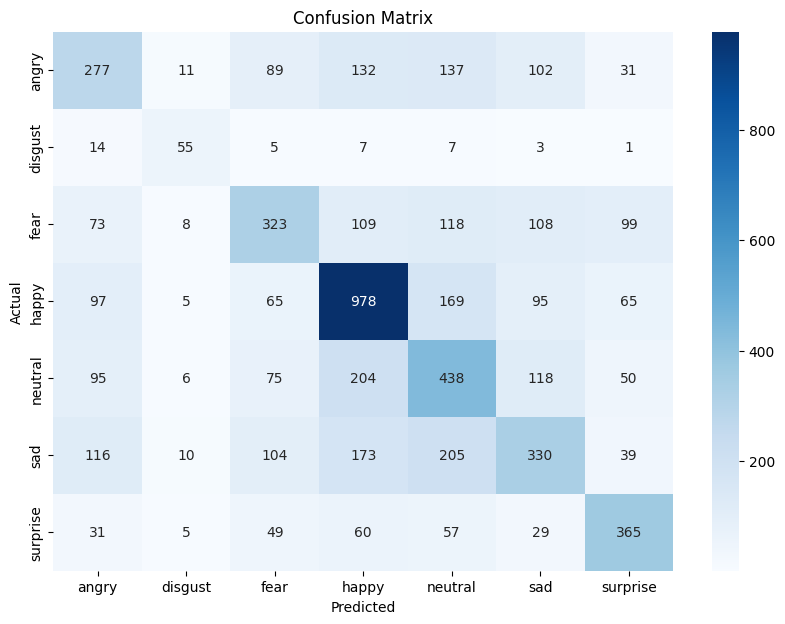

In [11]:
import seaborn as sns

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, emotions):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=emotions, yticklabels=emotions)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix for validation set
plot_confusion_matrix(val_conf_matrix, emotion_list)